STUDENT GRADE PREDICTION

In [123]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [116]:
#Reading data frame
data= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')

In [117]:
data.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [118]:
#Checking data samples
data.sample(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
340,CS-97341,D,D,B,C+,D,B-,B,B-,B-,...,C,F,B+,F,NaN,F,C,B,D+,1.804
243,CS-97244,A,A-,A-,A+,A-,A,A-,B+,A-,...,B-,B+,A,B-,A,A,B+,A-,A,3.593
77,CS-97078,A-,B-,A,C+,B-,A-,C+,B,A-,...,C,A-,A-,A-,A,A+,B,A,A,3.295
335,CS-97336,D,C-,D,D+,C+,B-,B-,C-,D+,...,A,D+,D+,C,C-,B+,C+,B,NaN,1.936
461,CS-97462,A,A-,A,A,A,A+,A-,B+,A-,...,A,B,A,A-,A,B+,A,A-,A-,3.843
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
115,CS-97116,B-,B-,C,B-,C+,C+,D+,C+,A-,...,C-,B,B-,C,A-,A,B-,B+,A,2.566
260,CS-97261,A,A-,A,A+,A,A+,A,A-,A-,...,A-,A,A+,A-,A-,A,A-,A,A,3.751
331,CS-97332,C+,B-,C+,C-,B-,B-,B,C+,C,...,A-,D,D+,B,C+,B+,C,B+,NaN,2.188
153,CS-97154,A,B,A-,B,B+,A-,C-,A-,B+,...,C,C,B,C+,A-,A,B-,C+,B+,2.936


In [120]:
data.shape

(571, 43)

In [102]:
#We can see that all the columns except CGPA has object data type and a lot of columns have null values. Let'iss check the total
#missing/null values in each column
data.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [126]:
#Let's drop unwanted column Seat no.
data.drop('Seat No.', axis=1, inplace=True)

In [127]:
#We can see that most colummns have null values in it. Let's handle null values and convert dtype for further analysis.
from sklearn.preprocessing import OneHotEncoder


In [128]:
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
encoder = OneHotEncoder(sparse=False)
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))
feature_names = []
for col, categories in zip(categorical_cols, encoder.categories_):
    feature_names.extend([f"{col}_{category}" for category in categories])
encoded_cols.columns = feature_names

data = pd.concat([data, encoded_cols], axis=1)

In [129]:
data

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W,CS-412_nan
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,D,D+,D,B-,C,D,A,D+,D,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,A+,A,A,A,A,A,A,A-,A,A,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
568,B,A,A-,B+,A,A,A,A,A,B,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
data.drop(categorical_cols, axis=1, inplace=True)


In [131]:
data.head()

,CGPA,PH-121_A,PH-121_A+,PH-121_A-,PH-121_B,PH-121_B+,PH-121_B-,PH-121_C,PH-121_C+,PH-121_C-,...,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W,CS-412_nan
0,2.205,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.608,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.448,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
data.isnull().sum()

CGPA          0
PH-121_A      0
PH-121_A+     0
PH-121_A-     0
PH-121_B      0
             ..
CS-412_D      0
CS-412_D+     0
CS-412_F      0
CS-412_W      0
CS-412_nan    0
Length: 565, dtype: int64

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Columns: 565 entries, CGPA to CS-412_nan
dtypes: float64(565)
memory usage: 2.5 MB


In [134]:
data.sample(15)

,CGPA,PH-121_A,PH-121_A+,PH-121_A-,PH-121_B,PH-121_B+,PH-121_B-,PH-121_C,PH-121_C+,PH-121_C-,...,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W,CS-412_nan
211,3.645,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
483,3.648,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,3.970,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,3.656,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,3.044,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,3.248,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
290,3.071,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,3.227,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,3.400,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
129,2.208,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#We can see that all null values have been fixed, also all object type columns have been converted to float.
#Even though the number of columns are high, we consider on keeping all columns as in real time scenario,maeks of all exams
#(for all 3 years) contribute to CGPA(overall grade of student)

In [135]:
data.describe()

,CGPA,PH-121_A,PH-121_A+,PH-121_A-,PH-121_B,PH-121_B+,PH-121_B-,PH-121_C,PH-121_C+,PH-121_C-,...,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W,CS-412_nan
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,2.954888,0.194396,0.038529,0.196147,0.099825,0.106830,0.098074,0.057793,0.054291,0.033275,...,0.140105,0.064799,0.033275,0.042032,0.012259,0.008757,0.014011,0.010508,0.005254,0.138354
std,0.620552,0.396082,0.192638,0.397429,0.300029,0.309168,0.297675,0.233557,0.226789,0.179511,...,0.347400,0.246386,0.179511,0.200837,0.110137,0.093248,0.117637,0.102057,0.072357,0.345574
min,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.538000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.029000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.451000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.985000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
#Let's separate feature and columns
X=data.drop(columns=['CGPA'],axis=1)
y=data['CGPA']

In [137]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

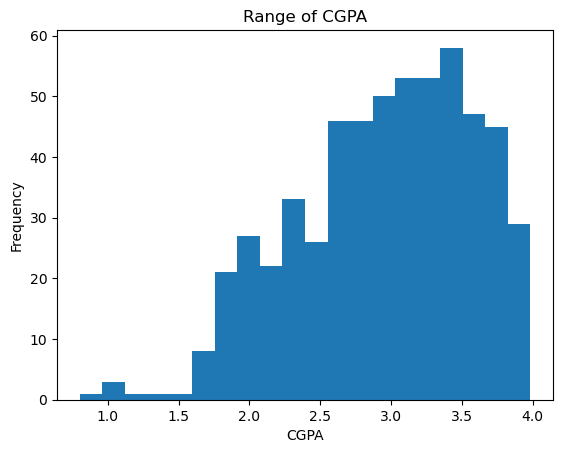

In [138]:
#Let's check the range of CGPA vizually-

plt.hist(y, bins=20)
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('Range of CGPA')
plt.show()

In [140]:
#Scaling and Fitting the Data
from sklearn.preprocessing import StandardScaler

In [141]:
scaler=StandardScaler()

In [142]:
X_scaled=scaler.fit_transform(X)

In [143]:
X_scaled

array([[-0.49122739, -0.20018207, -0.49397238, ..., -0.10305081,
        -0.07267524, -0.40071075],
       [ 2.03571711, -0.20018207, -0.49397238, ..., -0.10305081,
        -0.07267524, -0.40071075],
       [ 2.03571711, -0.20018207, -0.49397238, ..., -0.10305081,
        -0.07267524, -0.40071075],
       ...,
       [-0.49122739, -0.20018207, -0.49397238, ..., -0.10305081,
        -0.07267524, -0.40071075],
       [ 2.03571711, -0.20018207, -0.49397238, ..., -0.10305081,
        -0.07267524, -0.40071075],
       [-0.49122739, -0.20018207, -0.49397238, ..., -0.10305081,
        -0.07267524, -0.40071075]])

In [139]:
#Splitting data into train and test sets
from sklearn.model_selection import train_test_split


In [144]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=42)

In [145]:
X_train

array([[-0.49122739,  4.99545248, -0.49397238, ..., -0.10305081,
        -0.07267524, -0.40071075],
       [-0.49122739, -0.20018207,  2.02440467, ..., -0.10305081,
        -0.07267524, -0.40071075],
       [-0.49122739, -0.20018207, -0.49397238, ..., -0.10305081,
        -0.07267524, -0.40071075],
       ...,
       [ 2.03571711, -0.20018207, -0.49397238, ..., -0.10305081,
        -0.07267524, -0.40071075],
       [ 2.03571711, -0.20018207, -0.49397238, ..., -0.10305081,
        -0.07267524, -0.40071075],
       [-0.49122739, -0.20018207,  2.02440467, ..., -0.10305081,
        -0.07267524, -0.40071075]])

In [149]:
# As there are too many features let's apply Dimension reduction using Principal Components Analysis-
from sklearn.decomposition import PCA

In [150]:
pca = PCA(n_components=0.90)
pca.fit_transform(X_scaled)
sum(pca.explained_variance_ratio_)

0.9009152205336303

In [151]:
#Model training
#Using Linear Regression
from sklearn.linear_model import LinearRegression


In [152]:
lr=LinearRegression()

In [154]:
lr.fit(X_train,y_train)

LinearRegression()

In [156]:
y_pred=lr.predict(X_test)

In [157]:
#Checking r2 score and MAE for train and test
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [159]:
score = metrics.r2_score(y_test,y_pred)
print("R2 Score:",score)
mean_score = metrics.mean_squared_error(y_test,y_pred)
print("Mean Squared Error Score:",mean_score)

R2 Score: 0.9521902998087219
Mean Absolute Error Score: 0.016201460042267215


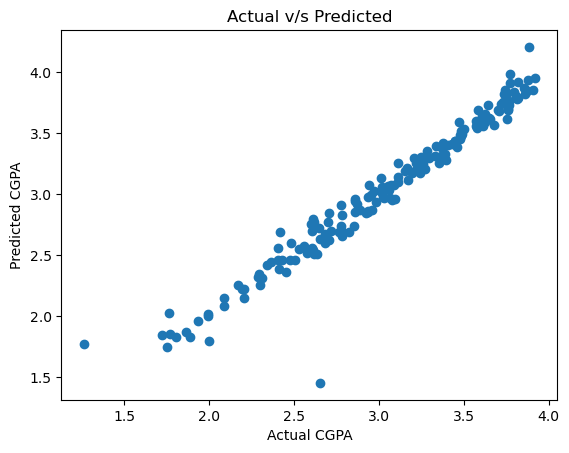

In [178]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual v/s Predicted')
plt.show()

In [160]:
#Using Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [161]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [162]:
y_pred1 = gbr.predict(X_test)

In [163]:
score = metrics.r2_score(y_test,y_pred1)
print("R2 Score:",score)
mean_score = metrics.mean_squared_error(y_test,y_pred1)
print("Mean Squared Error Score:",mean_score)


R2 Score: 0.8760034984564506
Mean Squared Error Score: 0.04201917931092211


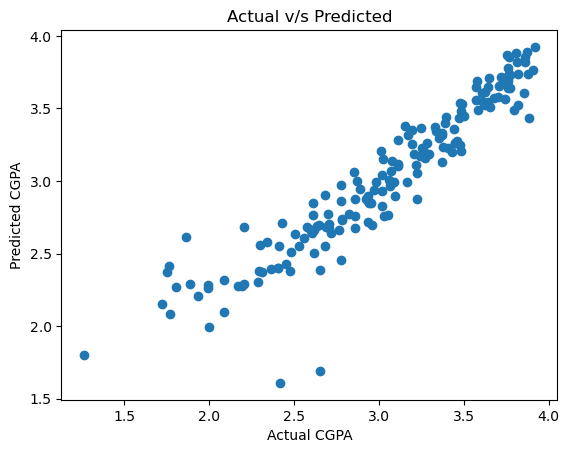

In [179]:
plt.scatter(y_test, y_pred1)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual v/s Predicted')
plt.show()

In [164]:
#Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [166]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)


DecisionTreeRegressor()

In [167]:
y_pred2 = dt.predict(X_test)

In [168]:
score = metrics.r2_score(y_test,y_pred2)
print("R2 Score:",score)
mean_score = metrics.mean_squared_error(y_test,y_pred2)
print("Mean Squared Error Score:",mean_score)

R2 Score: 0.7074744264959917
Mean Squared Error Score: 0.09912928488372094


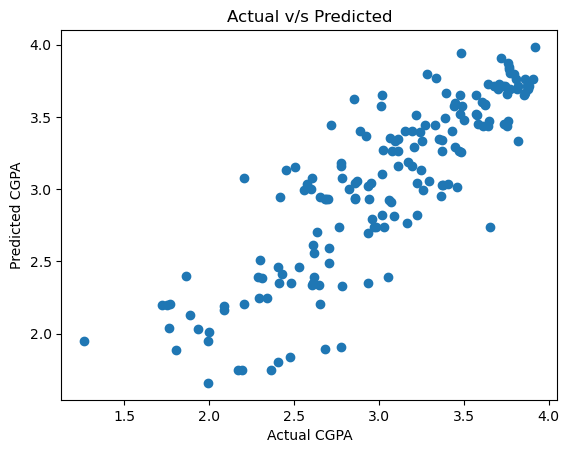

In [180]:
plt.scatter(y_test, y_pred2)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual v/s Predicted')
plt.show()

In [170]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor

In [172]:
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [173]:
y_pred3 = rfr.predict(X_test)

In [174]:
score = metrics.r2_score(y_test,y_pred3)
print("R2 Score:",score)
mean_score = metrics.mean_squared_error(y_test,y_pred3)
print("Mean Squared Error Score:",mean_score)

R2 Score: 0.8775457406069345
Mean Squared Error Score: 0.0414965536831395


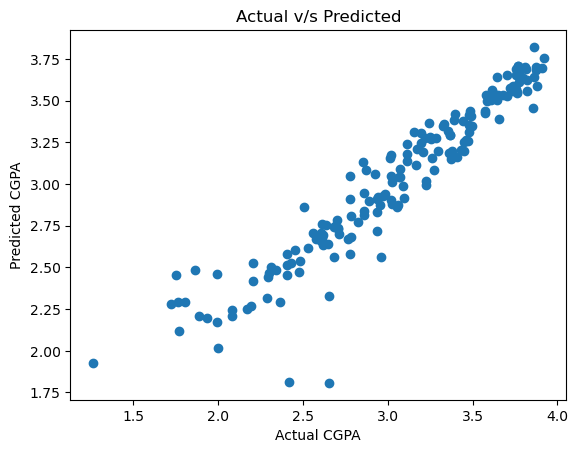

In [181]:
plt.scatter(y_test, y_pred3)
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')
plt.title('Actual v/s Predicted')
plt.show()

In [ ]:
#Clearly, we can see that Linear Regression model gives the highest r2 score=95% and lowest MSE=0.016



In [182]:
y_pred = lr.predict(X_test)
data1 = pd.DataFrame({'Actual' : y_test, 'LR predicted': y_pred})

In [184]:
data1

,Actual,LR predicted
509,1.992,2.015147
70,3.490,3.494411
131,2.823,2.694549
512,2.288,2.321953
542,3.816,3.781497
...,...,...
69,3.578,3.543202
255,1.764,2.024901
177,3.369,3.391167
284,3.919,3.955440


In [185]:
#Save the model using Joblib
import joblib


In [189]:
joblib.dump(lr,'Student grade prediction')

['Student grade prediction']

In [190]:
model = joblib.load('Student grade prediction')

In [191]:
model

LinearRegression()

In [ ]:
#Conclusion-Linear regression model effectively captured the relationship between the input features (grades)
#and the target variable (CGPA), providing reliable predictions.